In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("X/X_train.parquet")
X_test = pd.read_parquet("X/X_test.parquet")
Y_train = pd.read_parquet("Y/Y_train.parquet")
Y_test = pd.read_parquet("Y/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']]
Complete = pd.read_parquet("dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))
Y1_train = Y_train[[0]]
Y1_test = Y_test[[0]]
Y2_train = Y_train[[1]]
Y2_test = Y_test[[1]]
Y3_train = Y_train[[2]]
Y3_test = Y_test[[2]]
Y4_train = Y_train[[3]]
Y4_test = Y_test[[3]]
Y5_train = Y_train[[4]]
Y5_test = Y_test[[4]]
Y6_train = Y_train[[5]]
Y6_test = Y_test[[5]]

## Train and score

In [4]:
parameters = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
              'n_estimators':[50, 100, 200, 500, 1000],
              'max_depth': [2,3,5,10,20,30,50,100]} 

In [5]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [ ]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.09377837181091309 s, score: 0.06483265253974102
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.21716737747192383 s, score: 0.1232535068917282
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.5080645084381104 s, score: 0.22315354456753822
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.2102010250091553 s, score: 0.4710416593896633
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.6963987350463867 s, score: 0.7272630017007725
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.18210506439208984 s, score: 0.07801726857621338
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

In [ ]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y2_train))

In [ ]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y3_train))

In [ ]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True)
clf4 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y4_train))

In [ ]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y5_train))

In [6]:
g = GridSearch(GradientBoostingRegressor(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = GradientBoostingRegressor(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}, 0 de 240
Tiempo de entrenamiento: 0.13655972480773926 s, score: 0.06741060278886546
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}, 1 de 240
Tiempo de entrenamiento: 0.27324914932250977 s, score: 0.12925322286369112
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200}, 2 de 240
Tiempo de entrenamiento: 0.49808692932128906 s, score: 0.2392390405874566
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}, 3 de 240
Tiempo de entrenamiento: 1.3498930931091309 s, score: 0.48078525652957904
Probando: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 1000}, 4 de 240
Tiempo de entrenamiento: 2.253242254257202 s, score: 0.712036008204352
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}, 5 de 240
Tiempo de entrenamiento: 0.13670659065246582 s, score: 0.07754872022463011
Probando: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators'

Tiempo de entrenamiento: 0.8303122520446777 s, score: 0.8196967091864704
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 500}, 53 de 240
Tiempo de entrenamiento: 2.2335734367370605 s, score: 0.9562290034311509
Probando: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1000}, 54 de 240
Tiempo de entrenamiento: 4.9141151905059814 s, score: 0.9746906198589996
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 50}, 55 de 240
Tiempo de entrenamiento: 0.39653515815734863 s, score: 0.3739839338189428
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 100}, 56 de 240
Tiempo de entrenamiento: 0.9007775783538818 s, score: 0.6001205213306171
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 200}, 57 de 240
Tiempo de entrenamiento: 1.8798177242279053 s, score: 0.8203423426048927
Probando: {'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 500}, 58 de 240
Tiempo de entrenamiento: 3.9993300437927246 s, score: 0.946

Tiempo de entrenamiento: 0.5774049758911133 s, score: 0.5989117877245125
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100}, 106 de 240
Tiempo de entrenamiento: 1.1030406951904297 s, score: 0.8177040497342075
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 200}, 107 de 240
Tiempo de entrenamiento: 2.1234657764434814 s, score: 0.9251158245768709
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500}, 108 de 240
Tiempo de entrenamiento: 4.455948829650879 s, score: 0.9426974605656671
Probando: {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 1000}, 109 de 240
Tiempo de entrenamiento: 5.96006178855896 s, score: 0.9428767649803617
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 50}, 110 de 240
Tiempo de entrenamiento: 0.6120889186859131 s, score: 0.5990059631399197
Probando: {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 100}, 111 de 240
Tiempo de entrenamiento: 0.9070203304290771 s, score: 0.81727

Tiempo de entrenamiento: 1.0693087577819824 s, score: 0.9421115605184908
Probando: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 1000}, 159 de 240
Tiempo de entrenamiento: 1.2129006385803223 s, score: 0.9419572055177874
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}, 160 de 240
Tiempo de entrenamiento: 0.1344296932220459 s, score: 0.9423615154090866
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}, 161 de 240
Tiempo de entrenamiento: 0.1705944538116455 s, score: 0.9547678302876293
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}, 162 de 240
Tiempo de entrenamiento: 0.35198116302490234 s, score: 0.9599974426208998
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}, 163 de 240
Tiempo de entrenamiento: 1.1415796279907227 s, score: 0.9562201784807627
Probando: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}, 164 de 240
Tiempo de entrenamiento: 2.215122938156128 s, score: 0.9618458303

Tiempo de entrenamiento: 0.583045244216919 s, score: 0.9749500611386201
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}, 212 de 240
Tiempo de entrenamiento: 0.945582389831543 s, score: 0.9774273264199265
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 500}, 213 de 240
Tiempo de entrenamiento: 0.7990243434906006 s, score: 0.9631717599426015
Probando: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}, 214 de 240
Tiempo de entrenamiento: 0.9671614170074463 s, score: 0.9684638218287127
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 50}, 215 de 240
Tiempo de entrenamiento: 0.17620277404785156 s, score: 0.9548030794419029
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}, 216 de 240
Tiempo de entrenamiento: 0.2505176067352295 s, score: 0.9641658856226721
Probando: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 200}, 217 de 240
Tiempo de entrenamiento: 0.1925506591796875 s, score: 0.955166173780

## Test for each year

In [ ]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

In [ ]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

## One concrete example

In [ ]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

In [ ]:
scalerY.inverse_transform([Y_test.iloc[i]])

## Probamos con España

In [7]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [ ]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [ ]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [ ]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [ ]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [ ]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

In [ ]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [8]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf6.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

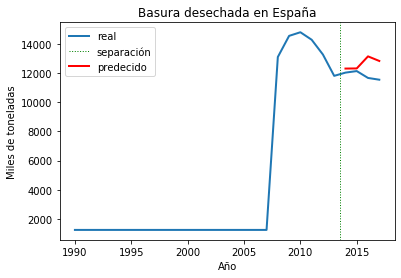

In [10]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura desechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()